Koordinatları Belirleme

In [6]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
plt.ioff()
import pandas as pd

info = pd.read_csv(os.path.join("data", "patient_info.csv"))
image_dir = os.path.join("data", "pano", "images")
crop_dir = os.path.join("data", "pano", "cropped_images")
dir_15 = os.path.join("data", "pano","15")
dir_25 = os.path.join("data", "pano","25")
if not os.path.exists(crop_dir):
    os.makedirs(crop_dir)
    os.makedirs(os.path.join(crop_dir,"1_root_images"))
    os.makedirs(os.path.join(crop_dir,"2_root_images"))

if not os.path.exists(dir_15):
    os.makedirs(dir_15)
if not os.path.exists(dir_25):
    os.makedirs(dir_25)
    
one_root_dir = os.path.join(crop_dir,"1_root_images")
two_root_dir = os.path.join(crop_dir,"2_root_images")

In [2]:
info["patient_id"][332]

'patient341'

patient343.jpg
15: 530 920
25: 370 1920


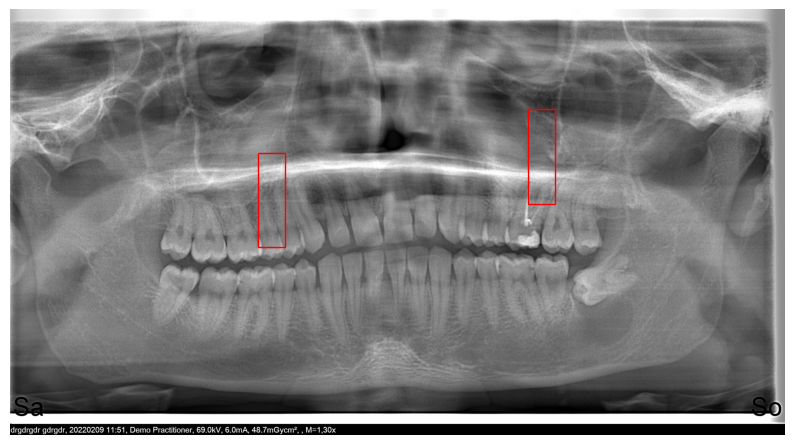

In [4]:
# import itertools
# from itertools import product

# y_coor = list(range(300,601,50))
# x_15_coor = list(range(800,1201,50))
# x_25_coor = list(range(1650,1851,50))
# y_len, x_len = 350, 100

# id="patient343.jpg"
# patient_dir = os.path.join(image_dir, id)
# img = mpimg.imread(patient_dir)

# y1, x1 = 530, 920 # 15 numara

# y2, x2 = 370, 1920 # 25 numara
# print(id)
# print("15:", y1, x1)
# print("25:", y2, x2)

# fig, ax = plt.subplots(figsize=(10, 8))
# img_plot = ax.imshow(img, cmap=plt.cm.bone)
# rect1 = patches.Rectangle((x1, y1), x_len, y_len, linewidth=1, edgecolor='r', facecolor='none')
# rect2 = patches.Rectangle((x2, y2), x_len, y_len, linewidth=1, edgecolor='r', facecolor='none')

# ax.add_patch(rect1)
# ax.add_patch(rect2)
# plt.axis('off')
# plt.show()


Görüntülerin Doğru Koordinatlarla Kesilmesi

In [ ]:
# import itertools
# from itertools import product

# y_coor = list(range(300,601,50))
# x_15_coor = list(range(800,1201,50))
# x_25_coor = list(range(1650,1851,50))
# y_len, x_len = 350, 100

# #id="patient041.jpg"
# for id in info["patient_id"]:
#     id+=".jpg"
#     patient_dir = os.path.join(image_dir, id)

#     if os.path.exists(patient_dir):
#         img = mpimg.imread(patient_dir)
#     else:
#         continue

#     # y1, x1 = 400, 890 # 15 numara

#     # y2, x2 = 420, 1780 # 25 numara
#     # print(id)
#     # print("15:", y1, x1)
#     # print("25:", y2, x2)

#     for x1,y1 in list(itertools.product(x_15_coor, y_coor)):
#         fig, ax = plt.subplots(figsize=(10, 8))
#         img_plot = ax.imshow(img, cmap=plt.cm.bone)
#         rect = patches.Rectangle((x1,y1), x_len, y_len, linewidth=1, edgecolor="r", facecolor='none')
#         ax.add_patch(rect)
#         plt.axis('off')
#         plt.savefig(os.path.join(dir_15, f"{id[:-4]}_{y1}_{x1}.jpeg"), bbox_inches='tight', pad_inches=0)
#         plt.close()

#     for x1,y1 in list(itertools.product(x_25_coor, y_coor)):
#         fig, ax = plt.subplots(figsize=(10, 8))
#         img_plot = ax.imshow(img, cmap=plt.cm.bone)
#         rect = patches.Rectangle((x1,y1), x_len, y_len, linewidth=1, edgecolor="r", facecolor='none')
#         ax.add_patch(rect)
#         plt.axis('off')
#         plt.savefig(os.path.join(dir_25, f"{id[:-4]}_{y1}_{x1}.jpeg"), bbox_inches='tight', pad_inches=0)
#         plt.close()

#     # rect1 = patches.Rectangle((x1, y1), x_len, y_len, linewidth=1, edgecolor='r', facecolor='none')
#     # rect2 = patches.Rectangle((x2, y2), x_len, y_len, linewidth=1, edgecolor='r', facecolor='none')

#     # ax.add_patch(rect1)
#     # ax.add_patch(rect2)


In [14]:
for patient in info["patient_id"]:
    print(patient)

    check_root_num_15 = (info[info["patient_id"] == patient]["15_root_num"]==1).values[0]
    crop_coord_15 = (info[info["patient_id"] == patient]["15_pano_crop_coordinate"]).values[0]
    check_root_num_25 = (info[info["patient_id"] == patient]["25_root_num"]==1).values[0]
    crop_coord_25 = (info[info["patient_id"] == patient]["25_pano_crop_coordinate"]).values[0]

    if len(crop_coord_15) == 1 or len(crop_coord_25) == 1:
        continue
    else:
        patient_image = os.path.join(image_dir, f"{patient}.jpg")
        img = mpimg.imread(patient_image)

        # 15 numara
        coord_y_15, coord_x_15 = crop_coord_15.split("-")
        coord_y_15, coord_x_15 = int(coord_y_15), int(coord_x_15)
        y_len, x_len = 350, 100

        fig, ax = plt.subplots()
        plt.axis('off')
        img_15_plot = ax.imshow(img[coord_y_15:(coord_y_15+y_len), (coord_x_15):(coord_x_15+x_len)],
                                cmap=plt.cm.bone)

        root_dir = one_root_dir if check_root_num_15 else two_root_dir
        plt.savefig(os.path.join(root_dir, f"{patient}_15.jpeg"), bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        # 25 numara
        coord_y_25, coord_x_25 = crop_coord_25.split("-")
        coord_y_25, coord_x_25 = int(coord_y_25), int(coord_x_25)
        y_len, x_len = 350, 100

        fig, ax = plt.subplots()
        plt.axis('off')
        img_25_plot = ax.imshow(img[coord_y_25:(coord_y_25+y_len), (coord_x_25):(coord_x_25+x_len)],
                                cmap=plt.cm.bone)

        root_dir = one_root_dir if check_root_num_25 else two_root_dir
        plt.savefig(os.path.join(root_dir, f"{patient}_25.jpeg"), bbox_inches='tight', pad_inches=0)
        plt.close(fig)



patient001
patient002
patient003
patient004
patient005
patient006
patient007
patient008
patient009
patient010
patient011
patient012
patient013
patient014
patient015
patient016
patient017
patient018
patient019
patient020
patient021
patient022
patient023
patient024
patient025
patient026
patient027
patient028
patient029
patient030
patient031
patient032
patient033
patient034
patient035
patient036
patient037
patient038
patient039
patient040
patient041
patient042
patient043
patient044
patient045
patient046
patient047
patient048
patient049
patient050
patient051
patient052
patient053
patient054
patient055
patient056
patient057
patient058
patient059
patient060
patient061
patient062
patient063
patient064
patient065
patient066
patient067
patient068
patient069
patient070
patient071
patient072
patient073
patient074
patient075
patient076
patient077
patient078
patient079
patient080
patient081
patient082
patient083
patient084
patient085
patient086
patient087
patient088
patient089
patient090
patient091